<h1>Stroke Prediction</h1>
<h3>Using ROC to get the best model</h3>
Find the dataset <a href='https://www.kaggle.com/fedesoriano/stroke-prediction-dataset'>here</a>
<h4>-By Aaryansh Sahay</h4><br> Find me here:
    <ul><li><a href='#'>Medium</a></li><li><a href='#'>Github</a></li></ul>
<p>Aim: to select a model which will perform best and give the most accurate prediction using ROC curve. This notebook is a reference to  <a href='#'>ROC AUC implementation in Machine Learning</a> Article.<br><br></p>

<h3> Loading Dataset</h3>

In [2]:
import pandas as pd
df=pd.read_csv(r'C:\Users\sahay\Downloads\data\stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h4>Dropping the 'id' column as it is not a feature.</h4>

In [3]:
df.drop('id',axis=1,inplace=True)

<h4>Checking the distinct values in 'smoking_status' column</h4>

In [4]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<h4>Checking the total number of NA values in the dataset</h4>

In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
len(df)

5110

<h4>Since the total number of na values is very less (Around 4%) , Dropping columns which contain na value</h4>

In [7]:
df.dropna(inplace=True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<h4>Label Encoding the categorical columns</h4>

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
cols=['gender','ever_married','work_type','Residence_type','smoking_status']
for i in cols:
    df[i]=le.fit_transform(df[i])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


<h4>Splitting the data into training set and testing set</h4>

In [10]:
X=df[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y=df['stroke']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

<h4>Importing the neccessary machine learning modules and displaying the accuracy for each model</h4>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

model1=LogisticRegression(max_iter=3000)
model1.fit(X_train,y_train)
y1_pred=model1.predict(X_test)

model2=RandomForestClassifier()
model2.fit(X_train,y_train)
y2_pred=model2.predict(X_test)

model3=GaussianNB()
model3.fit(X_train,y_train)
y3_pred=model3.predict(X_test)

models=['Logistic Regression','Random Forest Classifier','Gaussian Naive Bayes']
preds=[y1_pred,y2_pred,y3_pred]
for i,j in zip(models,preds):
    print('Accuracy for {} is {}'.format(i,metrics.accuracy_score(y_test,j)))

Accuracy for Logistic Regression is 0.9470468431771895
Accuracy for Random Forest Classifier is 0.9460285132382892
Accuracy for Gaussian Naive Bayes is 0.8686354378818737


<p><h4>After getting the accuracy of all the models , we'll:</h4>
<ul><li>Calculatethe probability score</li><li> Get the FPR,TPR and threshold values</li><li>Get the auc score</li></ul> </p>

In [12]:
y1_pred_proba=model1.predict_proba(X_test)[::,1]
y2_pred_proba=model2.predict_proba(X_test)[::,1]
y3_pred_proba=model3.predict_proba(X_test)[::,1]

fpr1,tpr1,thresh1=metrics.roc_curve(y_test,y1_pred_proba)
fpr2,tpr2,thresh2=metrics.roc_curve(y_test,y2_pred_proba)
fpr3,tpr3,thresh3=metrics.roc_curve(y_test,y3_pred_proba)

auc1=metrics.roc_auc_score(y_test,y1_pred_proba)
auc2=metrics.roc_auc_score(y_test,y2_pred_proba)
auc3=metrics.roc_auc_score(y_test,y3_pred_proba)

<h3>Plotting the curve using matplotlib</h3>

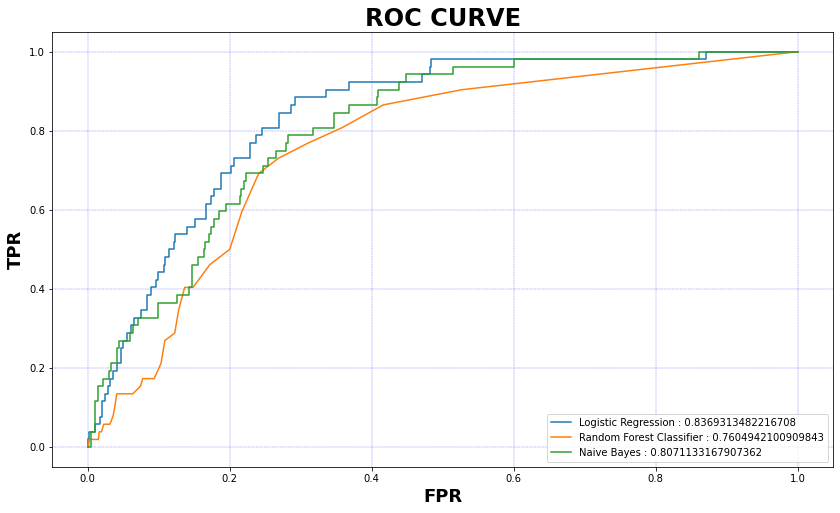

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(fpr1,tpr1,label='Logistic Regression : {}'.format(str(auc1)))
plt.plot(fpr2,tpr2,label='Random Forest Classifier : {}'.format(str(auc2)))
plt.plot(fpr3,tpr3,label='Naive Bayes : {}'.format(str(auc3)))
plt.legend(loc=4)
plt.grid(color='b',ls='-.',lw=0.25)
plt.xlabel('FPR',weight='bold',fontsize=18)
plt.ylabel('TPR',weight='bold',fontsize=18)
plt.title('ROC CURVE',weight='bold',fontsize=24)
plt.show()

<h4>Since logistic regression has the highest AUC score , it'll give the best accuracy(out of all). Plotting the graph for lit seperately.</h4>

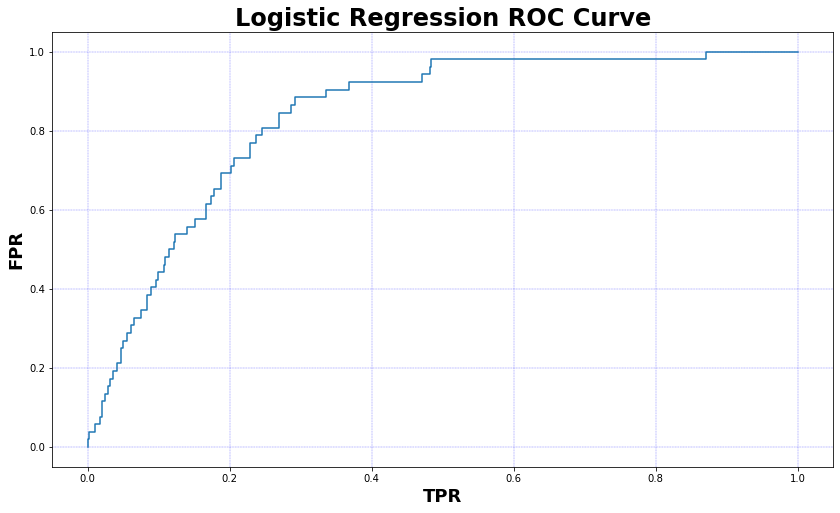

In [37]:

plt.figure(figsize=(14,8))
plt.plot(fpr1,tpr1)
plt.grid(color='b',ls='-.',lw=0.25)
plt.xlabel('TPR',fontsize=18,weight='bold')
plt.ylabel('FPR',fontsize=18,weight='bold')
plt.title('Logistic Regression ROC Curve',fontsize=24,weight='bold')
plt.show()

<h4>Plotting the point of maximum threshold on the graph which will give the best accuracy for logistic regression </h4>

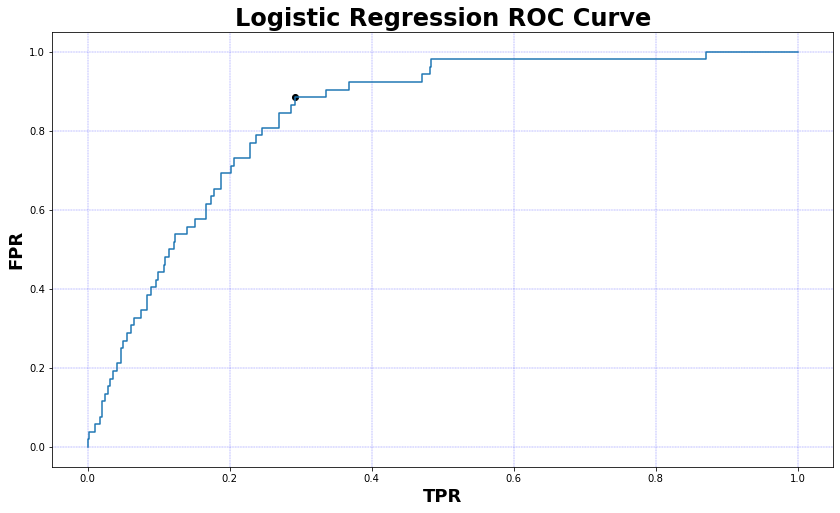

In [38]:
gmeans=tpr1*(1-fpr1)
gmeans=np.sqrt(gmeans)
ix=np.argmax(gmeans)


plt.figure(figsize=(14,8))
plt.plot(fpr1,tpr1)
plt.scatter(fpr1[ix],tpr1[ix],marker='o',color='black')
plt.grid(color='b',ls='-.',lw=0.25)
plt.xlabel('TPR',fontsize=18,weight='bold')
plt.ylabel('FPR',fontsize=18,weight='bold')
plt.title('Logistic Regression ROC Curve',fontsize=24,weight='bold')
plt.show()


<h4>Displaying the best threshold</h4>

In [40]:
print('Best Threshold for Logistic Regression is:')
print(thresh1[ix])
print('Geometric Mean:',gmeans[ix])

Best Threshold for Logistic Regression is:
0.03489535763501357
Geometric Mean: 0.7917325078188581
